# Лабораторная работа 8. Алгоритмы сортировки и поиска.

# 1. Алгоритмы сортировки.

In [ ]:
ary = [0,3,5,1,2,3,5,4,2,34,43,24]

# 1.1. Сортировка выбором

Алгоритм:
- найти наименьший элемент в неотсортированной части массива;
- поставить его в начало;
- сдвинуть начало неотсортированной части. 

Сложность: $O(n^2)$.

Программа:

In [ ]:
def selection_sort(arrayToSort):
    a = arrayToSort
    n = len(a)
    for i in range(n):
        idxMin = i
        for j in range(i+1, n):
            if a[j] < a[idxMin]:
                idxMin = j
                tmp = a[idxMin]
                a[idxMin] = a[i]
                a[i] = tmp
    return a


Тестовый запуск:

In [ ]:
print (selection_sort(ary.copy()))

[0, 2, 2, 1, 4, 3, 3, 5, 5, 24, 34, 43]


# 1.2. Сортировка вставками

Алгоритм:
- из неотсортированной части берется элемент;
- вставляется в отсортированную часть на своё мосто (в начале массива). 

Сложность: $O(n^2)$.

In [ ]:
def insertion_sort(arrayToSort):
    a = arrayToSort.copy() 
    n = len(a)
    for i in range(n):
        v = a[i]
        j = i
        while (a[j-1] > v) and (j > 0):
            a[j] = a[j-1]
            j = j - 1
        a[j] = v
    return a
print()

In [ ]:
print (insertion_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.3. Сортировка методом пузырька

Алгоритм:
- последовательно сравниваются пары элементов идущих друг за другом;
- в случае несоответствия выбранному порядку меняются местами. 

Сложность: $O(n^2)$.

In [ ]:
def bubble_sort(arrayToSort):
    a = arrayToSort.copy() 
    n = len(a)
    for i in range(n,0,-1):
        for j in range(1, i):
            if a[j-1] > a[j]:
                tmp = a[j-1]
                a[j-1] = a[j]
                a[j] = tmp
    return a

In [ ]:
print (bubble_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.4. Сортировка слиянием

Алгоритм:
- сортируемый массив разбивается на две части примерно одинакового размера;
- каждая из получившихся частей сортируется отдельно, например — тем же самым алгоритмом;
- два упорядоченных массива половинного размера соединяются в один. 

Сложность: $O(n log_2 n)$.

In [ ]:
def merge_sort(arrayToSort):
    if len(arrayToSort)>1:
        mid = len(arrayToSort)//2
        lefthalf = arrayToSort[:mid]
        righthalf = arrayToSort[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i, j, k = 0, 0, 0       
        while i<len(lefthalf) and j<len(righthalf):
            if lefthalf[i]<righthalf[j]:
                arrayToSort[k]=lefthalf[i]
                i=i+1
            else:
                arrayToSort[k]=righthalf[j]
                j=j+1
            k=k+1
        while i<len(lefthalf):
            arrayToSort[k]=lefthalf[i]
            i=i+1; k=k+1
        while j<len(righthalf):
            arrayToSort[k]=righthalf[j]
            j=j+1; k=k+1

In [ ]:
alist = ary.copy() 
merge_sort(alist); 
print(alist)

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.5. Быстрая сортировка

Алгоритм:
- выбрать (опорным) элемент из массива;
- перераспределить элементы в массиве так, что элементы меньше опорного помещаются перед ним, а больше или равные после;
- применить первые два шага к подмассивам слева и справа от опорных элементов, пока в подмассивах не останется не более одного элемента. 

Сложность: Средняя $O(n log_2 n)$, Худшая $O(n^2)$.

In [ ]:
def quick_sort(a, l, r):
    if (r > l):
        v, i, j = a[r], l - 1, r

        while (True):
            i, j = i + 1, j - 1                            
            while(a[i] < v): i = i + 1
            while(a[j] > v): j = j - 1
            if (i >= j): break
            a[i], a[j] = a[j], a[i]
            
        a[i], a[r] = a[r], a[i]

        quick_sort(a, l, i - 1)
        quick_sort(a, i + 1, r)

In [ ]:
alist = ary.copy() 
quick_sort(alist, 0, len(alist)-1)
print (ary)

[0, 3, 5, 1, 2, 3, 5, 4, 2, 34, 43, 24]


# Упражнение 1. Сортировка подсчётом.

Есть ли алгоритмы сортировки со сложностью, меньшей $O(n log_2 n)$?

Да, если известны свойства ключей. Например, если число возможных вариантов значений ограничено (и невелико) можно воспользоваться сортировкой подсчётом. 

Алгоритм:
- создать массив с числом эллементов равным количеству возможным вариантов ключа, заполнить его 0;
- перебрать (пройти) сортируемое множество подсчитывая количество ключей с конкретным значением (увеличивая на 1 значения соответствующего эллемента ранее созданного массива);
- записать подряд все ненулевые эллементы получившегося массива соответствующее его значению число раз.

Сложность: $O(n+k)$, где $k$ - число вариантов ключей.

Напишите программу (функцию) реализующую данный алгоритм.

In [ ]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Сортировка подсчётом.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [ ]:
S  = [10, 5, 14, 7, 3, 2, 18, 4, 5, 13, 6, 8]
F = list()
for i in range(21):
    F += [0]
for i in S:
    F[i] += 1
print(S)
z = 0
for i in range(len(F)):
    # print("--", i)
    if F[i] > 0:
        for j in range(F[i]):
            # print(i)
            S[z] = i
            z += 1
print(S)

[10, 5, 14, 7, 3, 2, 18, 4, 5, 13, 6, 8]
[2, 3, 4, 5, 5, 6, 7, 8, 10, 13, 14, 18]


# Пример. Число $\pi$

In [ ]:
from sympy import *
import numpy as np
import time
import pylab
import matplotlib.pyplot as plt

In [ ]:
# Выведем заданное колличество знаков числа pi
npi=7;
print('Выведем %i знаков числа пи:\n' %npi, pi.n(npi));

Выведем 7 знаков числа пи:
 3.141593


Конвертируем дробную часть числа $\pi$ в список:

In [ ]:
PI = [int(i) for i in str(pi.n(npi))[2:]]

Кроме того, можем считать цифры дробной части числа $\pi$ из файла (в котором храняться 10 000 000 его символов):

In [ ]:
f = open("pi-10million.txt")  #  открываем файл
fs = f.readline(npi)          #  считываем из него npi символов
f.close()                     #  закроем файл

In [ ]:
fs

'1415926'

In [ ]:
Pi = [int(i) for i in fs]
print(Pi)

[1, 4, 1, 5, 9, 2, 6]


# Упражнение. Сортировка $\pi$

Сравните временную сложность всех рассмотренных алгоритмов сортировки на примере цифр числа $\pi$.

Воспользуйтесь для этого замером времени с помощью библиотеки tame. Пример:

In [ ]:
start_time = time.time()
PI2 = insertion_sort(PI) 
Tame=time.time()-start_time
print ('Отсортированные цифры числа пи: \n\n', PI2)
print('\n Время потраченное на сортировку составило %15.7e секунд' %(Tame))

Отсортированные цифры числа пи: 

 [1, 1, 3, 4, 5, 9]

 Время потраченное на сортировку составило   0.0000000e+00 секунд


Запишем отсортированный список в файл:

In [ ]:
f1 = open("pi_sort.txt", 'w')
f1.writelines('%i' % i for i in PI2)
f1.close()

Проверим что получилось:

In [ ]:
f1 = open("pi_sort.txt", 'r')
fs = f1.readlines()          #  считываем всё содержимое файла
print(fs)
f1.close()

['000000000000000000000000000000000000000000000000000111111111111111111111111111111111111111111111111111111111111112222222222222222222222222222222222222222222222222222222222233333333333333333333333333333333333333333333333333333333334444444444444444444444444444444444444444444444444444444444455555555555555555555555555555555555555555555555555556666666666666666666666666666666666666666666666666666666777777777777777777777777777777777777777788888888888888888888888888888888888888888888888888888888999999999999999999999999999999999999999999999999999999999']


Посмотрим как меняются затраты времени на сортировку вставками при увеличении числа сортируемых объектов:

In [ ]:
ik = 31
Tame = np.zeros(ik)
NPI = [(i+1)*150 for i in range(ik)]
i=0
for npi in NPI:
    PI = [int(i) for i in str(pi.n(npi))[2:]]

    start_time = time.time()
    PI2 = insertion_sort(PI) 
    Tame[i]=time.time()-start_time
    
    i+=1

	 size	 Tame(sec)
	 150 	 1.970e-03
	 300 	 8.000e-03
	 450 	 1.297e-02
	 600 	 1.593e-02
	 750 	 2.497e-02
	 900 	 3.588e-02
	 1050 	 4.448e-02
	 1200 	 5.884e-02
	 1350 	 7.514e-02
	 1500 	 9.800e-02
	 1650 	 1.140e-01
	 1800 	 1.321e-01
	 1950 	 1.632e-01
	 2100 	 1.951e-01
	 2250 	 2.250e-01
	 2400 	 2.548e-01
	 2550 	 2.817e-01
	 2700 	 3.114e-01
	 2850 	 3.656e-01
	 3000 	 4.538e-01
	 3150 	 5.078e-01
	 3300 	 5.217e-01
	 3450 	 5.378e-01
	 3600 	 5.766e-01
	 3750 	 6.141e-01
	 3900 	 6.839e-01
	 4050 	 7.564e-01
	 4200 	 8.187e-01
	 4350 	 8.770e-01
	 4500 	 9.445e-01
	 4650 	 1.014e+00


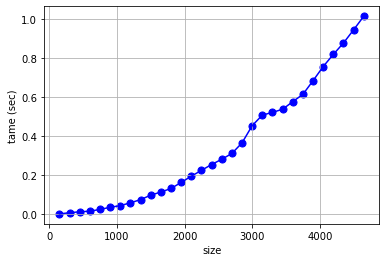

In [ ]:
print('\t size\t Tame(sec)')
for i in range(0,ik):
    print ('\t %i \t %.3e' %(NPI[i], Tame[i]))

# график функции
pylab.figure ()
plt.plot(NPI, Tame, c='b')
plt.scatter(NPI, Tame, c='b',s=50)
# параметры графика
xl = plt.xlabel("size");
yl = plt.ylabel("tame (sec)");
plt.grid(True);
plt.show();

# Пример. Последовательный поиск

In [ ]:
def dummy_search (a, key):
    n = len(a)
    for i in range(n):
        if a[i] == key:
            return i
    return n

In [ ]:
ary = [7,8,1,2,3,4,13,5,1,2,44,5,1]
print(dummy_search (ary, 13))

6


In [ ]:
# вероятно чуть более рациональная реализация
def clever_search (a, key):
    n = len(a)
    i=0
    while a[i]!=key:
        i=i+1
    return i

In [ ]:
ary2 = [7,8,1,2,3,4,13,5,1,2,44,5,1,44]
print(clever_search (ary2, 13))

6


In [ ]:
%timeit dummy_search (ary, 44)
    
%timeit clever_search (ary2, 44)

1.22 µs ± 16.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.12 µs ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Упражнение. Поиск в $\pi$

Найдите в дробной части числа $\pi$ порядковый номер каждой цифры начиная с 1 встретившейся количество раз равное её значению (первую единицу, вторую двойку и т.д.)

In [ ]:
from mpmath import mp
mp.dps = 100
podschet=[0]*10 # генерируем  список из 0
spisok=[]
pii=str(mp.pi)
pii=pii[2:]
spisok=list(pii)
sl=0
for i in spisok:
    spisok[sl]=int(i)
    sl+=1
    


F = list()
for i in range(100):
    F += [0]
for i in spisok:
    F[i] += 1
print(spisok)
z = 0
for i in range(len(F)): # сортировка
    # print("--", i)
    if F[i] > 0:
        for j in range(F[i]):
            # print(i)
            spisok[z] = i
            z += 1
print(spisok)
for i in spisok:
    
    podschet[i]+=1 # производим подсчет
print(podschet)

    
    
    
    





[1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6, 2, 6, 4, 3, 3, 8, 3, 2, 7, 9, 5, 0, 2, 8, 8, 4, 1, 9, 7, 1, 6, 9, 3, 9, 9, 3, 7, 5, 1, 0, 5, 8, 2, 0, 9, 7, 4, 9, 4, 4, 5, 9, 2, 3, 0, 7, 8, 1, 6, 4, 0, 6, 2, 8, 6, 2, 0, 8, 9, 9, 8, 6, 2, 8, 0, 3, 4, 8, 2, 5, 3, 4, 2, 1, 1, 7, 0, 6, 8]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[8, 8, 12, 11, 10, 8, 9, 7, 13, 13]


# Домашнее задание (базовое):

# Задание 1.

Найдите в числе $\pi$ номер цифры в дробной части после которой идёт последовательность из:

- шести 9;
- шесть 8;
- шесть 0;
- первых шести цифр;
- семь цифр вашего номера телефона.

In [ ]:
from mpmath import mp
mp.dps = 100000

find=input("введите число для поиска= ")
pii=str(mp.pi)

pii=pii[2:]
#print(pii)

for i in range(0,len(pii),1):
  #print(pii[i:i+len(find)],"индекс=",i)
  if pii[i:i+len(find)]==find:
    print(pii[i:i+len(find)],"индекс=",i)
#3,1415926535

#print(pii.find("999999"))
#print(pii.find("888888"))
#print(pii.find("000000"))
#print(pii.find("123456"))
#print(pii.find("892078"))

введите число для поиска= 999999
999999 индекс= 761


# Задание 2. Поиск в отсортированном массиве

Реализуйте алгоритмы сужения области:

- бинарный поиск (https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)
- метод золотого сечения (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F)
- интерполирующий поиск (https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)

(см. лекцию 3 с. 17)

In [ ]:
#бинарный
spis=[1,5,7,9,20,40,50,90]
def BinarySearch(lys, val):
    first = 0
    last = len(lys)-1
    index = -1
    while (first <= last) and (index == -1):
        mid = (first+last)//2
        if lys[mid] == val:
            index = mid
        else:
            if val<lys[mid]:
                last = mid -1
            else:
                first = mid +1
    return index
print(BinarySearch(spis, 20))

4


In [ ]:
#интерполирующий
def InterpolationSearch(lys, val):
    low = 0
    high = (len(lys) - 1)
    while low <= high and val >= lys[low] and val <= lys[high]:
        index = low + int(((float(high - low) / ( lys[high] - lys[low])) * ( val - lys[low])))
        if lys[index] == val:
            return index
        if lys[index] < val:
            low = index + 1;
        else:
            high = index - 1;
    return -1
print(InterpolationSearch(spis, 5))
#print(spisok)

1


In [ ]:
#золотого сечения
def goldsearch(lys, val):
    fibM_minus_2 = 0
    fibM_minus_1 = 1
    fibM = fibM_minus_1 + fibM_minus_2
    while (fibM < len(lys)):
        fibM_minus_2 = fibM_minus_1
        fibM_minus_1 = fibM
        fibM = fibM_minus_1 + fibM_minus_2
    index = -1;
    while (fibM > 1):
        i = min(index + fibM_minus_2, (len(lys)-1))
        if (lys[i] < val):
            fibM = fibM_minus_1
            fibM_minus_1 = fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
            index = i
        elif (lys[i] > val):
            fibM = fibM_minus_2
            fibM_minus_1 = fibM_minus_1 - fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
        else :
            return i
    if(fibM_minus_1 and index < (len(lys)-1) and lys[index+1] == val):
        return index+1;
    return -1
print(goldsearch([1,2,3,4,5,6,7,8,9,10,11], 6))

5


# Задание 3.

Сравните производительность алгоритмов из задания 2 на задании 1.

In [ ]:
from time import time
from mpmath import mp
mp.dps = 100000 #задаем размер pi после запятой
massiv=[] # создаем массив для хранения чисел последовательности пи размерности числа которого нам нужно найти
find=str(111111)# задаем размерность найденных чисел в пи
pii=str(mp.pi)

pii=pii[2:]
#print(pii)

for i in range(0,len(pii),1):
  #print(pii[i:i+len(find)],"индекс=",i)
  
   massiv+=[int(pii[i:i+len(find)])] # добавления чисел пи размерности "find"
#3,1415926535
#print(massiv)
quick_sort(massiv, 0, len(massiv)-1) # сортитруем массив быстрой соритровкой
#print (massiv.sort()) # отсортированный массив
print(massiv)
            
    
    

[1, 5, 10, 22, 22, 26, 41, 61, 65, 73, 90, 103, 106, 122, 139, 156, 162, 165, 175, 176, 181, 182, 183, 183, 190, 192, 197, 204, 213, 223, 223, 223, 241, 241, 257, 263, 266, 274, 281, 296, 296, 313, 322, 347, 350, 355, 356, 362, 392, 405, 407, 415, 422, 428, 448, 456, 465, 492, 518, 522, 532, 539, 539, 550, 565, 566, 568, 573, 599, 616, 644, 649, 650, 663, 674, 680, 699, 705, 714, 729, 730, 746, 813, 816, 831, 832, 851, 854, 858, 859, 870, 890, 895, 906, 907, 920, 921, 940, 944, 946, 956, 964, 971, 993, 996, 1016, 1020, 1035, 1065, 1071, 1097, 1125, 1133, 1133, 1163, 1179, 1179, 1220, 1223, 1225, 1226, 1237, 1238, 1239, 1239, 1254, 1260, 1261, 1264, 1295, 1296, 1299, 1322, 1340, 1341, 1348, 1358, 1372, 1396, 1397, 1399, 1405, 1432, 1453, 1460, 1476, 1492, 1502, 1541, 1554, 1566, 1566, 1566, 1586, 1588, 1589, 1593, 1602, 1604, 1608, 1611, 1614, 1620, 1623, 1645, 1649, 1650, 1678, 1688, 1698, 1720, 1754, 1765, 1791, 1814, 1824, 1825, 1827, 1831, 1832, 1835, 1838, 1842, 1852, 1858, 1863, 1

In [ ]:

import time

startTime = time.time()
binar=BinarySearch(massiv, 999999) # бинарная сортировка
endTime = time.time()

finallytime=endTime-startTime
print(finallytime,"бинарный поиск==",binar)

startTime1 = time.time()
inter=InterpolationSearch(massiv, 999999) # интерпалирующаяя сортировка
endTime1 = time.time()
finallytime1=endTime1-startTime1
print(finallytime1,"интерпалирующаяя поиск==",inter)


startTime2 = time.time()
gold=goldsearch(massiv, 999999)
endTime2 = time.time()
finallytime2=endTime1-startTime
print(finallytime2,"интерпалирующаяя поиск==",inter)


0.0 бинарный поиск== 99998
0.0 интерпалирующаяя поиск== 99998
0.0 интерпалирующаяя поиск== 99998


# Домашнее задание (дополнительное):

# Задание "Пирамидальная сортировка"

Напишите программу (функцию) реализующую алгоритм пирамидальной сортировки (https://ru.wikipedia.org/wiki/%D0%9F%D0%B8%D1%80%D0%B0%D0%BC%D0%B8%D0%B4%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0,
https://habr.com/ru/post/221095/,
Алгоритмы. Справочник с примерами на C, C , Java и Python (Хайнеман Дж., и др - 2017) с. 87).

In [ ]:
# Процедура для преобразования в двоичную кучу поддерева с корневым узлом i, что является индексом в arr[]. n - размер кучи
def heapify(arr, n, i):
    largest = i # Initialize largest as root
    l = 2 * i + 1   # left = 2*i + 1
    r = 2 * i + 2   # right = 2*i + 2

  # Проверяем существует ли левый дочерний элемент больший, чем корень

    if l < n and arr[i] < arr[l]:
        largest = l

    # Проверяем существует ли правый дочерний элемент больший, чем корень

    if r < n and arr[largest] < arr[r]:
        largest = r

    # Заменяем корень, если нужно
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i] # свап

        # Применяем heapify к корню.
        heapify(arr, n, largest)

# Основная функция для сортировки массива заданного размера
def heapSort(arr):
    n = len(arr)

    # Построение max-heap.
    for i in range(n, -1, -1):
        heapify(arr, n, i)

    # Один за другим извлекаем элементы
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i] # свап 
        heapify(arr, i, 0)

# Управляющий код для тестирования
arr = [ 12, 11, 13, 5, 6, 7]
heapSort(arr)
print(arr)



[5, 6, 7, 11, 12, 13]


# Задание "Малые тела"

Есть база данных малых тел солнечной системы созданная под эгидой Международного астрономического союза. Файл с этой базой можно скачать здесь https://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT, а здесь приведено его описание https://www.minorplanetcenter.net/iau/info/MPOrbitFormat.html

Отсортируйте эту базу по названию малого тела. Напишите две программы реализующие поиск в отсортированном и неотсартированном массивах. В последнем случае поиск может производиться по любому параметру из таблицы.

In [ ]:

!curl  https://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT > planet.txt
!ls -l


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

In [ ]:
#пример
#00001    3.31  0.15 K221L 291.37562   73.63703   80.26858   10.58769  0.0785010  0.21424745   2.7660431  0 MPO681823  7301 122 1801-2022 0.65 M-v 30k Pan        0000      (1) Ceres              20220126

In [ ]:
#сортировка не в отсортированном массиве и отсортированном
# сортировка базы данных по НАЗВАНИЮ ТЕЛА через пирамидальную чтение файла и создание новго с перезаписью отсортировкой данных
mas = [] #массив для параметров
masStr = [] #массив для строк
with open('planet.txt', 'r') as fp:  #открываем файл с бд
  for n, line in enumerate(fp, 1):
    
    line = line.rstrip('\n')
    
    d: int = len(line)
    if d == 202: # количество сивлов где находится информация
      if n > 100:  # ограничение по количеству 
        break
      s: str = line[175:194].strip() #название тела
      k: str= line[0:5] # нумерация
      
      s = s.strip()
      
      if s != " ":
        s=ord(s[0]) #
        
        mas += [s]
        masStr += [line]
# Сортировка через пирамиду
heapSort(mas)
with open('planetSort.txt', 'w') as fp:
  for word in mas:
    for line in masStr:
      s: str = line[175:194].strip()
      s=ord(s[0])
      if word == s:
        fp.write(line + "\n")
  fp.close()
print("Ok")

# поиск в отсортированном массиве по имени
with open('planetSort.txt', 'r') as fp:
  for word in mas:
    for line in masStr:
      s: str = line[175:194].strip()
      
      if s=="Astraea":
        j=line
print(j)
        
        



Ok
00005    6.98  0.15 K221L 160.98208  358.74039  141.57036    5.36762  0.1900994  0.23850283   2.5751766  0 MPO660785  3175  84 1845-2021 0.70 M-v 3Ek Pan        0000      (5) Astraea            20211105


In [ ]:
# поиск в неотсортированном массиве
mas = [] #массив для параметров
masStr = [] #массив для строк
with open('planet.txt', 'r') as fp:
  for n, line in enumerate(fp, 1):
    
    line = line.rstrip('\n')
    
    d: int = len(line)
    if d == 202: # количество сивлов где находится информация
      if n > 100:  # ограничение по количеству 
        break
      s: str = line[194:202].strip() #по уникальному номеру в конце
      
      
      s = s.strip()
      
      if s != " ":
        
        
        mas += [int(s)]
        masStr += [line]

with open('planet.txt', 'r') as fp:
  for word in mas:
    for line in masStr:
      s: str = line[175:194].strip()
      
      if s=="Astraea":
        j=line
print(j)


00005    6.98  0.15 K221L 160.98208  358.74039  141.57036    5.36762  0.1900994  0.23850283   2.5751766  0 MPO660785  3175  84 1845-2021 0.70 M-v 3Ek Pan        0000      (5) Astraea            20211105
